<b><font size="6">Techscape Project</font><a class="anchor"><a id='toc'></a></b><br>

# Import the needed libraries

In [114]:
import pandas as pd
import math
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 1- filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# 2- wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# 3- embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

# Import data

In [205]:
techscape = pd.read_csv('train.csv')
techscape.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [206]:
# Use this cell to check the values of each column 

techscape[techscape.AccountMng_Pages > 8].AccountMng_Pages.value_counts()

9     180
10    127
11     87
12     69
13     47
14     33
15     31
16     19
17     14
18     12
19      5
24      4
22      3
20      2
21      2
23      2
26      1
27      1
Name: AccountMng_Pages, dtype: int64

# Check for missing data

In [207]:
techscape.info()

# There are now missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

# Change the types of the variables

In [208]:
# ID does not make sense to be a int
techscape.Access_ID = techscape.Access_ID.astype('string') 

# Tranform Date into a datetime format
techscape.Date = pd.to_datetime(techscape.Date)

techscape.OS = techscape.OS.astype('string') 


techscape.Country = techscape.Country.astype('string') 


techscape.Type_of_Visitor = techscape.Type_of_Visitor.astype('string') 

techscape.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Access_ID                   9999 non-null   string        
 1   Date                        9999 non-null   datetime64[ns]
 2   AccountMng_Pages            9999 non-null   int64         
 3   AccountMng_Duration         9999 non-null   float64       
 4   FAQ_Pages                   9999 non-null   int64         
 5   FAQ_Duration                9999 non-null   float64       
 6   Product_Pages               9999 non-null   int64         
 7   Product_Duration            9999 non-null   float64       
 8   GoogleAnalytics_BounceRate  9999 non-null   float64       
 9   GoogleAnalytics_ExitRate    9999 non-null   float64       
 10  GoogleAnalytics_PageValue   9999 non-null   float64       
 11  OS                          9999 non-null   string      

# Deal with the outliers

In [170]:
# Se descriptive statistics for all the variables
techscape.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Access_ID,9999,9999,129279662,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,9999,305,2020-05-25 00:00:00,120,2020-02-01,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountMng_Pages,9999.0,NaN,NaN,NaN,NaT,NaT,2.324232,3.340676,0.0,0.0,1.0,4.0,27.0
AccountMng_Duration,9999.0,NaN,NaN,NaN,NaT,NaT,81.205854,179.715545,0.0,0.0,7.5,92.20835,3398.75
FAQ_Pages,9999.0,NaN,NaN,NaN,NaT,NaT,0.508051,1.27939,0.0,0.0,0.0,0.0,24.0
FAQ_Duration,9999.0,NaN,NaN,NaN,NaT,NaT,34.559101,139.796989,0.0,0.0,0.0,0.0,2549.375
Product_Pages,9999.0,NaN,NaN,NaN,NaT,NaT,31.685869,44.550277,0.0,7.0,18.0,38.0,705.0
Product_Duration,9999.0,NaN,NaN,NaN,NaT,NaT,1199.76943,1958.276304,0.0,183.5625,599.0,1470.2708,63973.5222
GoogleAnalytics_BounceRate,9999.0,NaN,NaN,NaN,NaT,NaT,0.022305,0.048776,0.0,0.0,0.0032,0.0168,0.2
GoogleAnalytics_ExitRate,9999.0,NaN,NaN,NaN,NaT,NaT,0.043181,0.048845,0.0,0.0143,0.0251,0.05,0.2


In [89]:
#techscape[['AccountMng_Pages', 'FAQ_Pages', 'Product_Pages']].describe().T
#techscape[['AccountMng_Duration', 'FAQ_Duration', 'Product_Duration']].describe().T
#techscape[['GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Browser', 'Type_of_Traffic']].describe().T


# AccountMng_Pages appears to have outliers
# Same with FAQ_Pages
# Product_Pages definitely has outliers
# GoogleAnalytics_PageValue appears to have outliers

In [209]:
# Separate the metric variables from the non metric ones 
non_metric_features = ['Access_ID', 'Date',"OS", "Browser", "Country", "Type_of_Traffic", "Type_of_Visitor", 'Buy'] 
metric_features = techscape.columns.drop(non_metric_features).to_list()

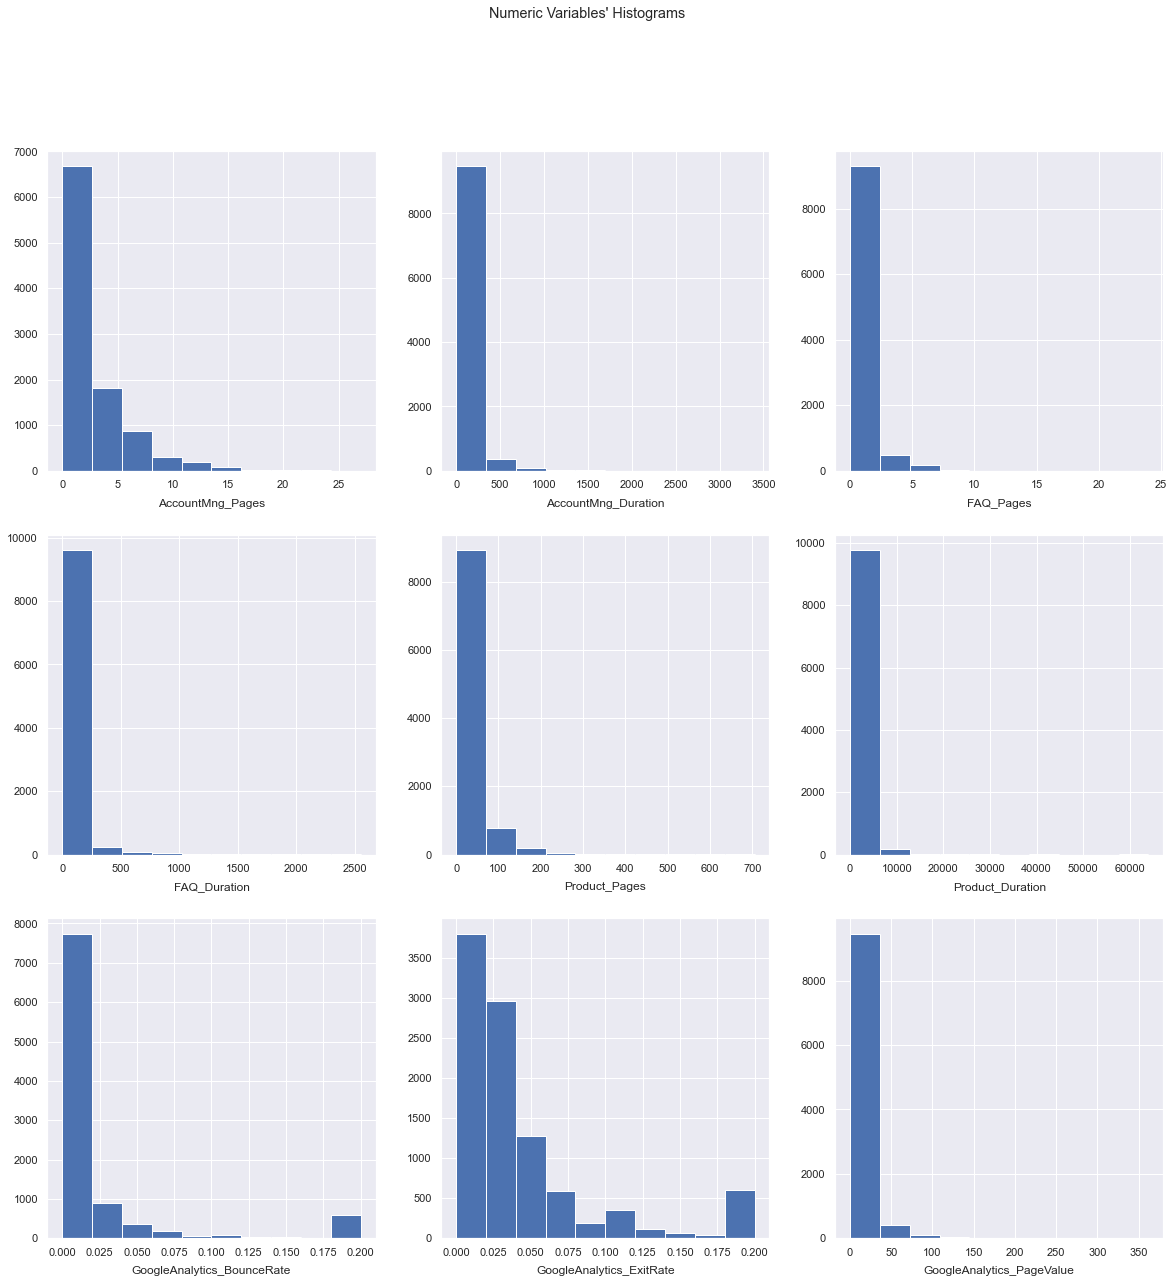

In [210]:
# -----------  Plot the histograms of the numeric variables  -----------

# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, math.ceil(len(metric_features) / 3), figsize=(20,20))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(techscape[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

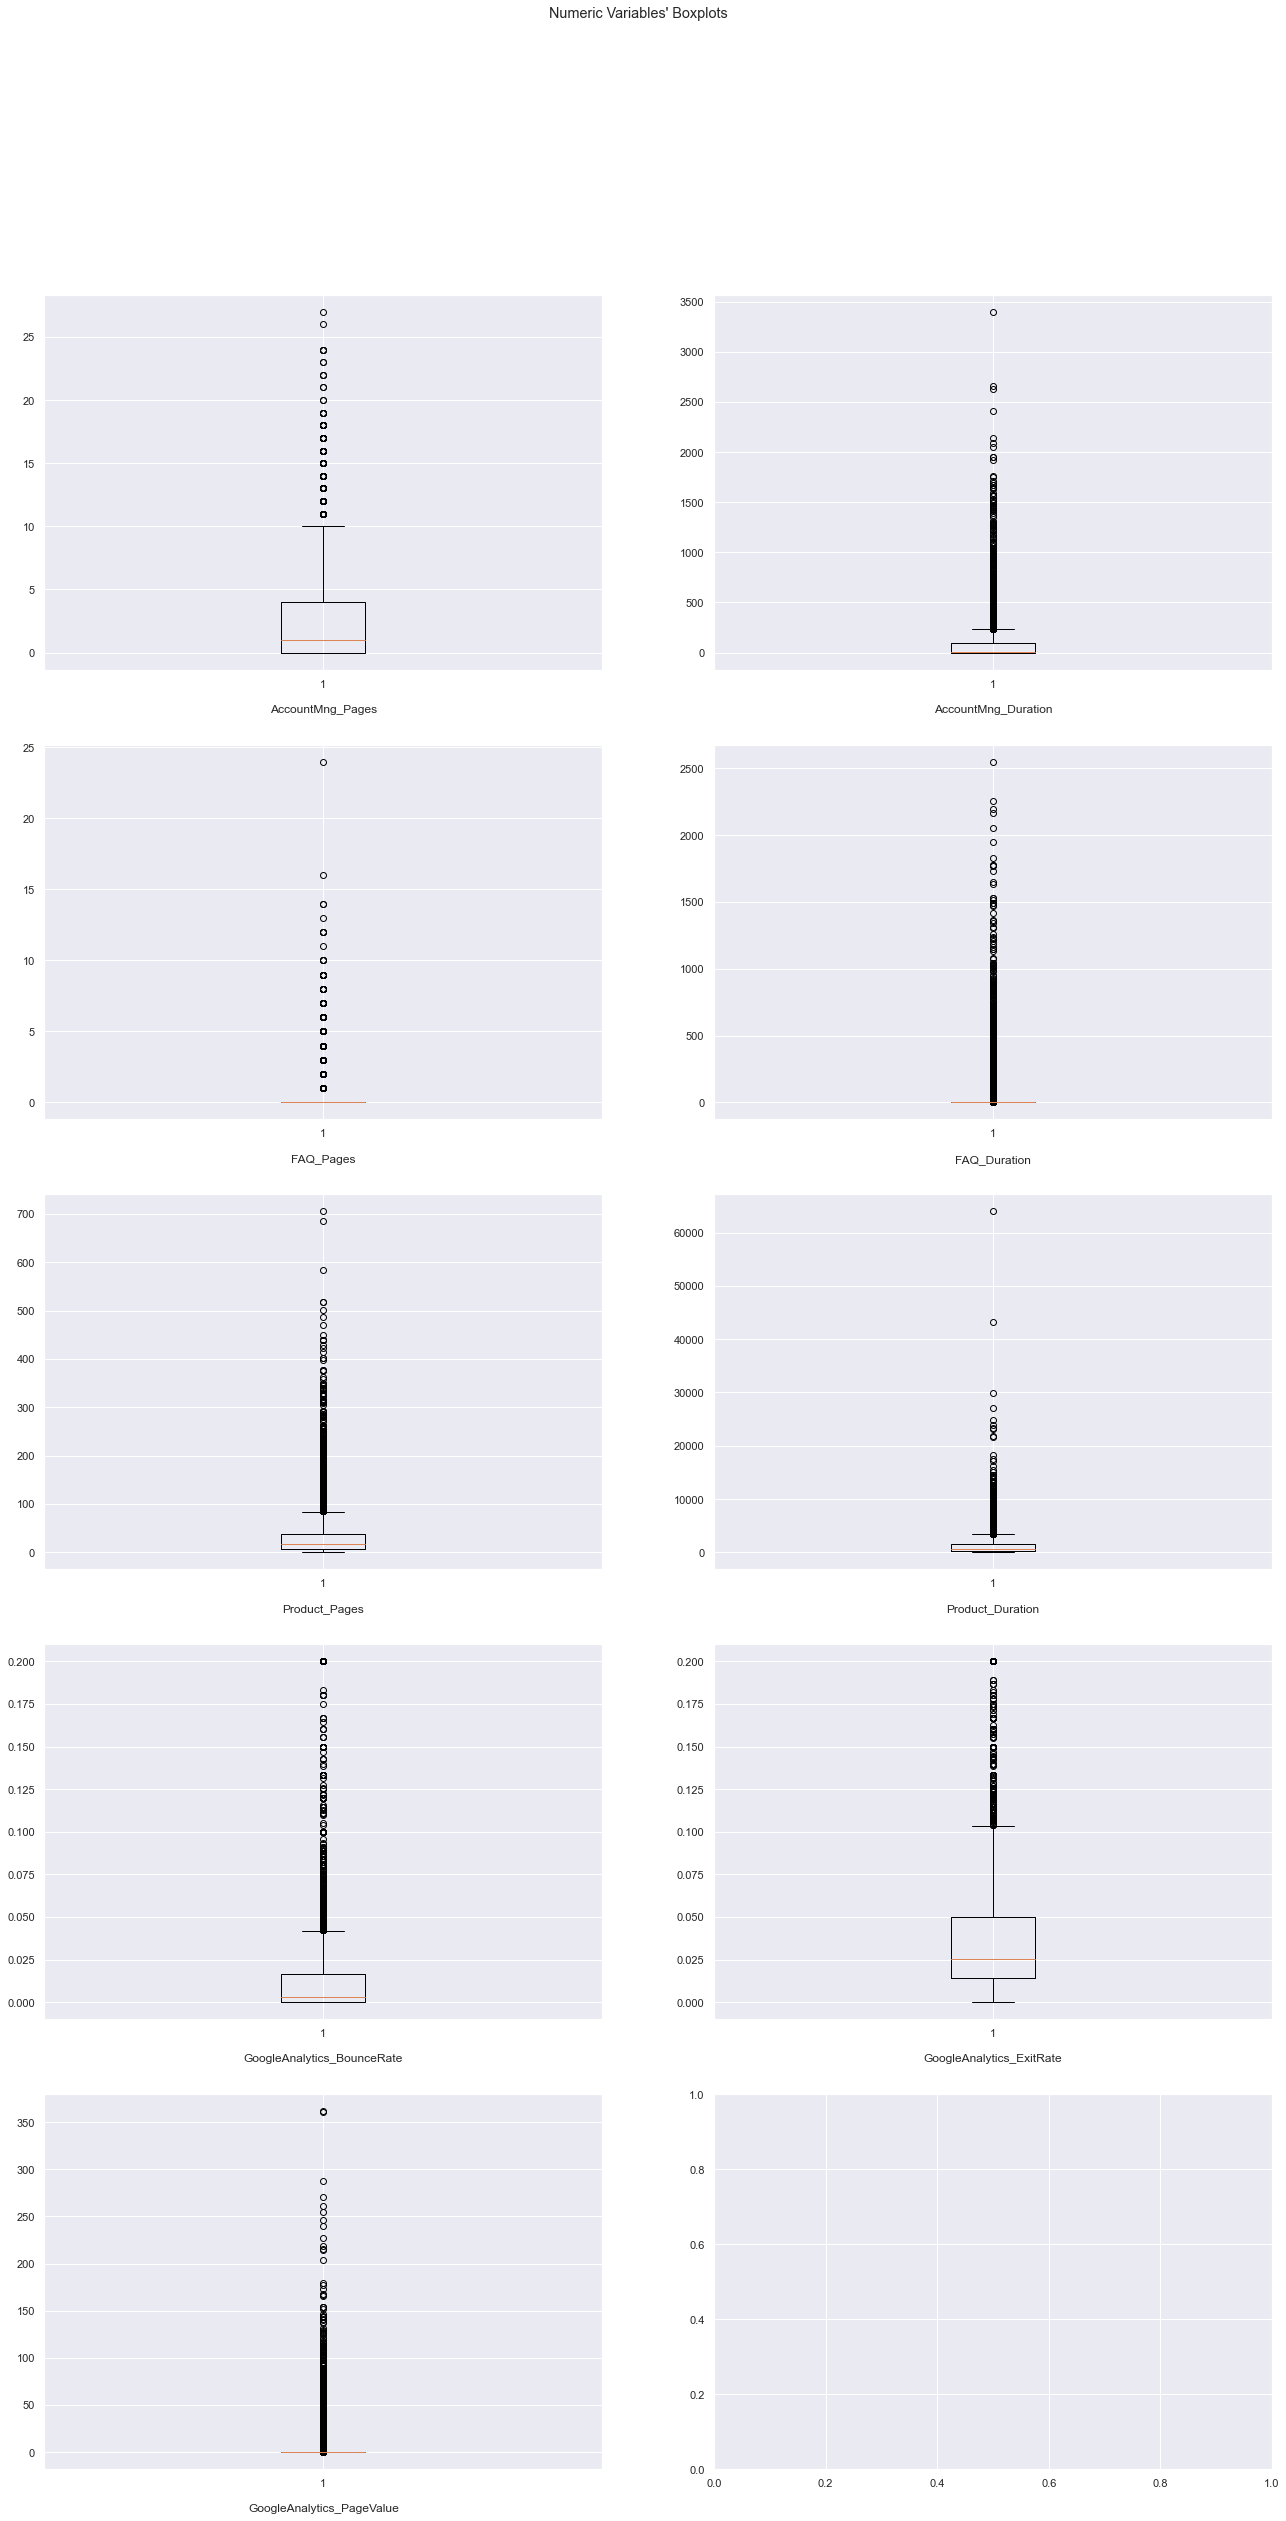

In [173]:
# -----------  Plot the boxplots of the numeric variables  -----------

# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(5, math.ceil(len(metric_features) / 5), figsize=(22, 40))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.boxplot(techscape[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Boxplots"

plt.suptitle(title)

plt.show()

In [211]:
# This may vary from session to session, and is prone to varying interpretations.
# A simple example is provided below:

filters1 = (
    (techscape['GoogleAnalytics_BounceRate']<= 0.1)
    &
    (techscape['GoogleAnalytics_ExitRate']<= 0.1)
    &
    (techscape['GoogleAnalytics_PageValue']<= 80)
    #&
    #(techscape['AccountMng_Pages']<= 18)  
    #&
    #(techscape['FAQ_Pages']<=7)
    #&
    #(techscape['FAQ_Duration']<=700)
    #&
    #(techscape['FAQ_Duration']<=700)    
)

techscape_1 = techscape[filters1]

perc_outliers1 = np.round((techscape.shape[0] - techscape_1.shape[0]) / techscape.shape[0] * 100, 2)
print(f'Percentage of outliers removed: {perc_outliers1}%')

Percentage of outliers removed: 10.29%


In [ ]:
#techscape[techscape.AccountMng_Pages > 8].AccountMng_Pages.value_counts()

In [113]:
#upper_lim

In [212]:
# ------------------  Interquantile method ------------------

#q25 = techscape.quantile(.25)
#q75 = techscape.quantile(.75)
#iqr = (q75 - q25)

techscape_mean, techscape_std = np.mean(techscape), np.std(techscape)

# We can change the number of stds
upper_lim = techscape_mean + 4 * techscape_std
lower_lim = techscape_mean - 4 * techscape_std

filters2 = []

for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    
    filters2.append(techscape[metric].between(llim, ulim, inclusive=True))

filters2 = pd.Series(np.all(filters2, 0))
techscape_2 = techscape[filters2]

perc_outliers2 = np.round((techscape.shape[0] - techscape_2.shape[0]) / techscape.shape[0] * 100, 2)
print(f'Percentage of outliers removed: {perc_outliers2}%')

Percentage of outliers removed: 5.57%


In [213]:
techscape_3 = techscape[(filters1 | filters2)]

perc_outliers3 = np.round((techscape.shape[0] - techscape_3.shape[0]) / techscape.shape[0] * 100, 2)
print(f'Percentage of outliers removed: {perc_outliers3}%')

Percentage of outliers removed: 1.12%


# Feature Engineering

In [214]:
# Create new variables

# Create binary variables for operating systems
techscape['Apple'] = techscape['OS'].apply(lambda x: 1 if x == 'MacOSX' or x == 'iOS' else 0)   
techscape['Windows'] = techscape['OS'].apply(lambda x: 1 if x == 'Windows' else 0) 
techscape['Android'] = techscape['OS'].apply(lambda x: 1 if x == 'Android' else 0)

# Create binary variables for countries
techscape['Portugal'] = techscape['Country'].apply(lambda x: 1 if x == 'Portugal' else 0) 
#techscape['European Union'] = techscape['Country'].apply(lambda x: 0 if x == 'United Kingdom' or x == 'Other' or x == 'Brazil' else 1)
techscape['Iberian_Peninsula'] = techscape['Country'].apply(lambda x: 1 if x == 'Portugal' or x == 'Spain' else 0)
techscape['Spain'] = techscape['Country'].apply(lambda x: 1 if x == 'Spain' else 0)

# Create binary variables for type of visitors
techscape['Returner'] = techscape['Type_of_Visitor'].apply(lambda x: 1 if x == 'Returner' else 0) 
techscape['New_Access'] = techscape['Type_of_Visitor'].apply(lambda x: 1 if x == 'New_Access' else 0)

# Create the total duration of the visits and total number of page visits
techscape['Total_Duration'] = techscape['AccountMng_Duration'] + techscape['FAQ_Duration'] + techscape['Product_Duration']
techscape['Total_Pages'] = techscape['AccountMng_Pages'] + techscape['FAQ_Pages'] + techscape['Product_Pages']

# Create the proportion of time on each page type
techscape['PropTime_AccountMng'] = techscape['AccountMng_Duration']/techscape['Total_Duration']
techscape['PropTime_FAQ'] = techscape['FAQ_Duration']/techscape['Total_Duration']
techscape['PropTime_Product'] = techscape['Product_Duration']/techscape['Total_Duration']

# Create the proportion of visited pages of each type
techscape['PropPages_AccountMng'] = techscape['AccountMng_Pages']/techscape['Total_Pages']
techscape['PropPages_FAQ'] = techscape['FAQ_Pages']/techscape['Total_Pages']
techscape['PropPages_Product'] = techscape['Product_Pages']/techscape['Total_Pages']

# Create the average time spent per page
techscape['AvgTimePerPage'] = techscape['Total_Duration']/techscape['Total_Pages']

# Create the month of the visit
techscape['Month'] = techscape['Date'].dt.month

techscape

# Tirar access_id? date?

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,...,Total_Duration,Total_Pages,PropTime_AccountMng,PropTime_FAQ,PropTime_Product,PropPages_AccountMng,PropPages_FAQ,PropPages_Product,AvgTimePerPage,Month
0,102863333,2020-03-21,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,...,64.0000,3,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,21.333333,3
1,103117814,2020-05-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,...,684.5000,23,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,29.760870,5
2,103201891,2020-12-04,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,...,95.0000,8,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,11.875000,12
3,103226087,2020-12-22,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,...,608.7500,9,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,67.638889,12
4,103234445,2020-11-24,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,...,1995.9397,38,0.000000,0.193393,0.806607,0.000000,0.052632,0.947368,52.524729,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,798279589,2020-05-08,3,159.0,2,55.5,23,1100.1250,0.0000,0.0111,...,1314.6250,28,0.120947,0.042217,0.836836,0.107143,0.071429,0.821429,46.950893,5
9995,798314158,2020-07-17,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,...,202.7000,9,0.863838,0.000000,0.136162,0.666667,0.000000,0.333333,22.522222,7
9996,798339820,2020-03-23,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,...,644.0000,27,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,23.851852,3
9997,798371242,2020-05-16,0,0.0,0,0.0,53,715.5000,0.0226,0.0363,...,715.5000,53,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,13.500000,5


# Check for incoherencies in the data


In [215]:
# Date variable
print(f'Date of the web visit varies from {techscape.Date.min()} and {techscape.Date.max()}, excluding the month of April.')

Date of the web visit varies from 2020-02-01 00:00:00 and 2020-12-31 00:00:00, excluding the month of April.


In [216]:
# Pages and Duration variables

#techscape[(techscape['AccountMng_Pages']==0) & (techscape['AccountMng_Duration']!=0) ] # --> 0
account_index = techscape[(techscape['AccountMng_Pages']>1) & (techscape['AccountMng_Duration']==0) ].index  # --> 3
len(account_index)
techscape.drop(account_index, axis=0, inplace=True)
techscape

#techscape[(techscape['FAQ_Pages']==0) & (techscape['FAQ_Duration']!=0) ] # --> 0
faq_index = techscape[(techscape['FAQ_Pages']>1) & (techscape['FAQ_Duration']==0) ].index # --> 9
len(faq_index)
techscape.drop(faq_index, axis=0, inplace=True)
techscape

#techscape[(techscape['Product_Pages']==0) & (techscape['Product_Duration']!=0) ] # --> 0
product_index = techscape[(techscape['Product_Pages']>1) & (techscape['Product_Duration']==0) ].index # --> 130
len(product_index)
techscape.drop(product_index, axis=0, inplace=True)
techscape

techscape.loc[techscape['Total_Duration']==0,'Total_Duration'] = 1 # --> 355
techscape

# Total removed = 3 + 9 + 130 + 355 = 497 (5%)

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,...,Total_Duration,Total_Pages,PropTime_AccountMng,PropTime_FAQ,PropTime_Product,PropPages_AccountMng,PropPages_FAQ,PropPages_Product,AvgTimePerPage,Month
0,102863333,2020-03-21,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,...,64.0000,3,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,21.333333,3
1,103117814,2020-05-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,...,684.5000,23,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,29.760870,5
2,103201891,2020-12-04,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,...,95.0000,8,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,11.875000,12
3,103226087,2020-12-22,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,...,608.7500,9,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,67.638889,12
4,103234445,2020-11-24,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,...,1995.9397,38,0.000000,0.193393,0.806607,0.000000,0.052632,0.947368,52.524729,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,798279589,2020-05-08,3,159.0,2,55.5,23,1100.1250,0.0000,0.0111,...,1314.6250,28,0.120947,0.042217,0.836836,0.107143,0.071429,0.821429,46.950893,5
9995,798314158,2020-07-17,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,...,202.7000,9,0.863838,0.000000,0.136162,0.666667,0.000000,0.333333,22.522222,7
9996,798339820,2020-03-23,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,...,644.0000,27,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,23.851852,3
9997,798371242,2020-05-16,0,0.0,0,0.0,53,715.5000,0.0226,0.0363,...,715.5000,53,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,13.500000,5


In [217]:
techscape['Total_Duration'].value_counts()

1.0000       470
17.0000       17
11.0000       14
12.0000       14
19.0000       12
            ... 
155.1666       1
1901.7583      1
1173.2333      1
1994.6134      1
1197.7002      1
Name: Total_Duration, Length: 8018, dtype: int64

In [218]:
# -------------- DATA PARTITION --------------

# Define data as all the independent variables
data = techscape.drop(['Buy'], axis=1)
# Define target as the dependent variable
target = techscape['Buy']

# -----------------------

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data, target, train_size=0.75, stratify = target, random_state=5)
# Train 0.75 || Valid 0.25
# Stratify so we have the same values in target in the train and val datasets

# -----------------------

X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
# DO IT for validation
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

In [219]:
# -------------- SCALLING --------------

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

## Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled.head(3)

X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,...,Total_Duration,Total_Pages,PropTime_AccountMng,PropTime_FAQ,PropTime_Product,PropPages_AccountMng,PropPages_FAQ,PropPages_Product,AvgTimePerPage,Month
2967,0.148148,0.026363,0.083333,0.004707,0.018440,0.002853,0.0,0.0740,0.000000,0.083333,...,0.004056,0.025469,0.315382,0.042239,0.642379,0.210526,0.105263,0.684211,0.012504,0.7
9346,0.000000,0.000000,0.000000,0.000000,0.009929,0.009038,0.0,0.1665,0.161675,0.333333,...,0.008262,0.009383,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.069075,0.3
5314,0.259259,0.189629,0.083333,0.065310,0.043972,0.025474,0.0,0.1305,0.000000,0.083333,...,0.034898,0.053619,0.264070,0.068220,0.667710,0.175000,0.050000,0.775000,0.051025,1.0


In [59]:
# 1 - Filter methods

In [220]:
# Check if any of the variables is univariate

X_train_num_scaled.var()

# There isn't univariate variables
# Keep: all
# Remove: none

AccountMng_Pages              0.015500
AccountMng_Duration           0.002861
FAQ_Pages                     0.003053
FAQ_Duration                  0.002818
Product_Pages                 0.003960
Product_Duration              0.000986
GoogleAnalytics_BounceRate    0.050431
GoogleAnalytics_ExitRate      0.052246
GoogleAnalytics_PageValue     0.002771
Browser                       0.021036
Type_of_Traffic               0.066740
Apple                         0.182630
Windows                       0.248505
Android                       0.166602
Portugal                      0.236052
Iberian_Peninsula             0.243877
Spain                         0.158030
Returner                      0.125157
New_Access                    0.120233
Total_Duration                0.000942
Total_Pages                   0.003878
PropTime_AccountMng           0.023199
PropTime_FAQ                  0.005719
PropTime_Product              0.029507
PropPages_AccountMng          0.015853
PropPages_FAQ            

# Feature Selection

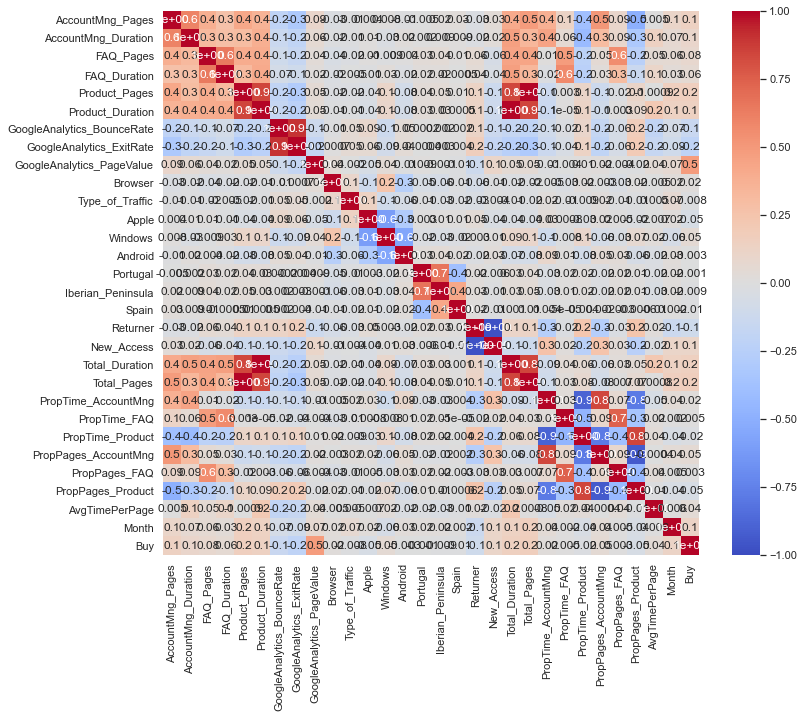

In [221]:
# Check correlations (numerical data)

all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head()

corr = all_train_num.corr(method = 'pearson')  # or spearman

def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, vmin=-1, vmax=1, annot = True, cmap ="coolwarm" , fmt='.1')

    plt.show()
    
cor_heatmap(corr)    

In [222]:
# Better visualization of correlation values (numerical data)

corr.style.applymap(lambda x: 'background-color : green' if x > 0.6 else ('background-color : red' if x < -0.6 else ''))

# Correlated variables: AccountMng_Duration-AccountMng_Pages, FAQ_Duration-FAQ_Pages, FAQ_Duartion-PropTime_FAQ,
#                       Product_Duration-Product_Pages, Product_Pages-Total_Duration, Product_Pages-Total_Pages,
#                       Product_Duration-Total_Duration, Product_Duration-Total_Pages, PropTime_FAQ-PropPages_FAQ
#                       GoogleAnalytics_BounceRate-GoogleAnalytics_ExitRate, Apple-Windows, Portugal-Iberian_Peninsula,
#                       Returner-New_Access, Total_Duration-Total_Pages, PropTime_AccountMng-PropTime_Product, 
#                       PropTime_AccountMng-PropPages_AccountMng, PropTime_AccountMng-PropTime_Product

# None of the indepent variables is highly correlated with the dependent one but there are a lot of highly correlated variables (|p|>=0.85)
# With other method, we should check for the relevancy the following pairs to choose one of them:
# - Product_Pages and Product_Duartion
# - GoogleAnalytics_BounceRate and GoogleAnalytics_ExitRate
# - Returner and New_Access
# - Total_Pages and Product_Pages
# - Total_Pages and Product_Duration
# - PropTime_Product and PropTime_AccountMng
# - PropPages_Product and PropPages_AccountMng
# - Total_Duration and Product_Duration

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Apple,Windows,Android,Portugal,Iberian_Peninsula,Spain,Returner,New_Access,Total_Duration,Total_Pages,PropTime_AccountMng,PropTime_FAQ,PropTime_Product,PropPages_AccountMng,PropPages_FAQ,PropPages_Product,AvgTimePerPage,Month,Buy
AccountMng_Pages,1.000000,0.606898,0.386527,0.269774,0.424524,0.366489,-0.208899,-0.307088,0.094210,-0.025541,-0.013062,0.003689,0.008125,-0.010484,-0.005179,0.016267,0.026538,-0.027424,0.031852,0.411351,0.488755,0.375521,0.120350,-0.385957,0.510140,0.094649,-0.494761,0.004600,0.103059,0.141922
AccountMng_Duration,0.606898,1.000000,0.321715,0.282413,0.304044,0.389538,-0.134588,-0.197992,0.062248,-0.015518,-0.012004,0.014412,-0.028864,0.021319,0.002440,0.009495,0.008813,-0.022294,0.024185,0.467021,0.343419,0.448795,0.057953,-0.423457,0.312154,0.085997,-0.312769,0.147714,0.065052,0.097487
FAQ_Pages,0.386527,0.321715,1.000000,0.640999,0.401818,0.405896,-0.106024,-0.158196,0.037850,-0.044078,-0.021335,0.010559,-0.008911,0.004122,0.033029,0.040262,0.009649,0.058659,-0.055216,0.447482,0.440197,0.011962,0.487399,-0.225191,0.048323,0.555795,-0.242096,0.048606,0.060001,0.082321
FAQ_Duration,0.269774,0.282413,0.640999,1.000000,0.318627,0.410607,-0.071122,-0.105770,0.016371,-0.023819,-0.004922,-0.012880,0.028861,-0.017302,0.022070,0.021339,-0.000465,0.041614,-0.039101,0.471200,0.342065,-0.017652,0.570374,-0.235464,0.030858,0.304142,-0.136468,0.104725,0.034590,0.061846
Product_Pages,0.424524,0.304044,0.401818,0.318627,1.000000,0.851295,-0.190786,-0.285356,0.048744,-0.017360,-0.016896,-0.038000,0.104668,-0.080401,0.038755,0.046483,0.010379,0.129712,-0.123744,0.842440,0.997062,-0.132685,0.003494,0.116112,-0.120211,-0.016947,0.114675,-0.000914,0.161831,0.162747
Product_Duration,0.366489,0.389538,0.405896,0.410607,0.851295,1.000000,-0.164263,-0.233997,0.045124,-0.013943,-0.012318,-0.039782,0.100374,-0.075521,0.032738,0.032598,0.000484,0.118179,-0.113850,0.994636,0.850985,-0.136250,0.000013,0.120806,-0.095952,0.002996,0.085634,0.216792,0.137312,0.147855
GoogleAnalytics_BounceRate,-0.208899,-0.134588,-0.106024,-0.071122,-0.190786,-0.164263,1.000000,0.901726,-0.112887,-0.013252,0.053065,0.090703,-0.119757,0.046631,0.000244,0.002089,0.002297,0.123409,-0.131591,-0.169509,-0.200318,-0.099595,-0.017008,0.095798,-0.169311,-0.056426,0.173136,-0.188745,-0.065027,-0.142773
GoogleAnalytics_ExitRate,-0.307088,-0.197992,-0.158196,-0.105770,-0.285356,-0.233997,0.901726,1.000000,-0.173785,0.000673,0.050732,0.058950,-0.087493,0.040727,-0.000432,0.002877,0.004102,0.166631,-0.177966,-0.242329,-0.299214,-0.125717,-0.042400,0.130139,-0.195419,-0.060159,0.198061,-0.161036,-0.094722,-0.206976
GoogleAnalytics_PageValue,0.094210,0.062248,0.037850,0.016371,0.048744,0.045124,-0.112887,-0.173785,1.000000,0.043407,-0.001901,-0.047560,0.042577,-0.011764,0.008515,-0.001178,-0.011871,-0.118206,0.108754,0.048523,0.054441,-0.012960,-0.004040,0.013271,0.018374,-0.004181,-0.015111,0.044706,0.066681,0.489565
Browser,-0.025541,-0.015518,-0.044078,-0.023819,-0.017360,-0.013943,-0.013252,0.000673,0.043407,1.000000,0.095958,-0.112399,0.246355,-0.255210,-0.047647,-0.057958,-0.013767,-0.064833,-0.012905,-0.015863,-0.019683,-0.004964,-0.031221,0.018147,-0.003477,-0.033667,0.015162,-0.005057,0.024254,0.021337


In [223]:
# Chi-Square for categorical data

X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)
    
    
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)
    
# Keep: Date, OS, Type_of_Visitor
# Remove: Access_ID, Country

Access_ID is NOT an important predictor. (Discard Access_ID from model)
Date is IMPORTANT for Prediction
OS is IMPORTANT for Prediction
Country is NOT an important predictor. (Discard Country from model)
Type_of_Visitor is IMPORTANT for Prediction


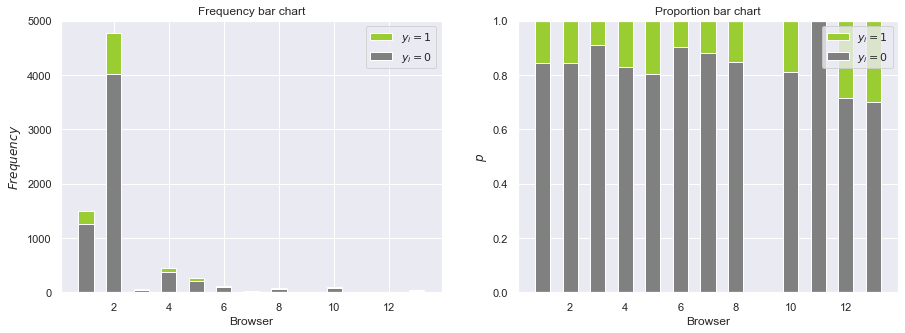

In [224]:
# Visualize weight of dependent variable in categorical data

# first join all the training data
all_train = X_train.join(y_train)


def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    #plt.xticks()
    plt.show()
    
bar_charts_categorical(all_train, "Browser", "Buy")

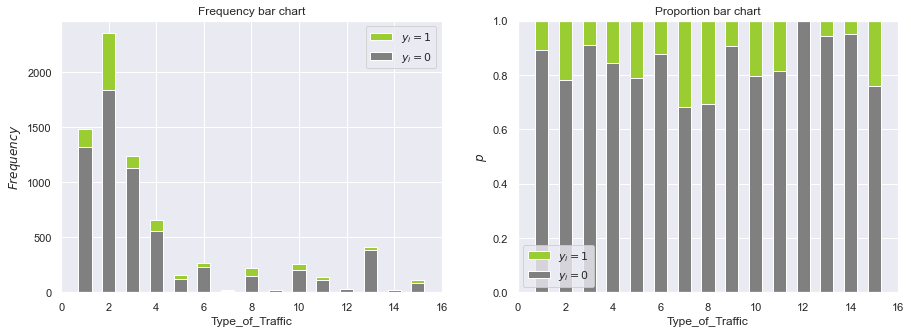

In [155]:
bar_charts_categorical(all_train, "Type_of_Traffic", "Buy")

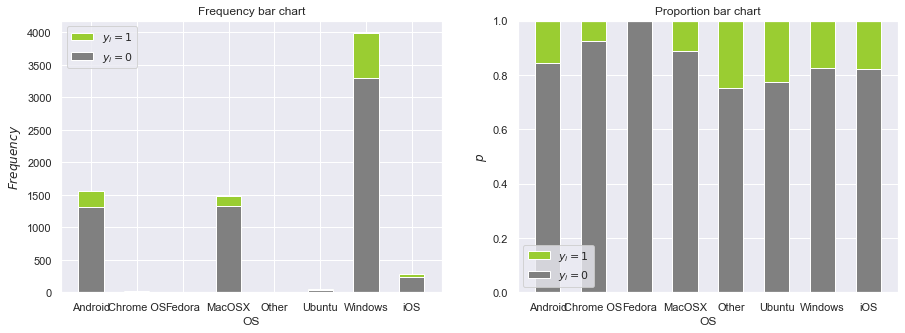

In [156]:
bar_charts_categorical(all_train, "OS", "Buy")

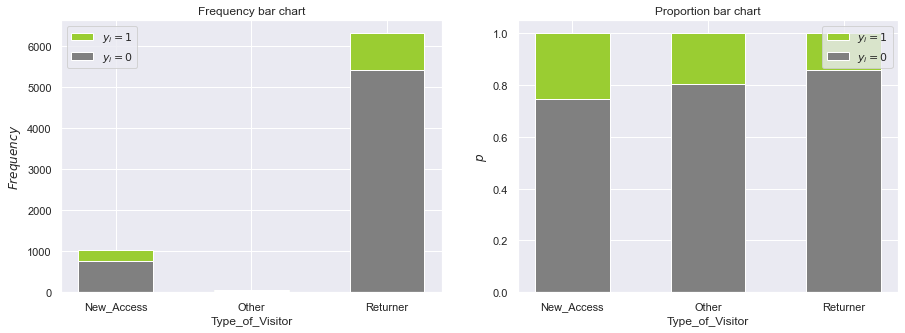

In [157]:
bar_charts_categorical(all_train, "Type_of_Visitor", "Buy")

In [225]:
X_train_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7392 entries, 4128 to 4863
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AccountMng_Pages            7392 non-null   float64
 1   AccountMng_Duration         7392 non-null   float64
 2   FAQ_Pages                   7392 non-null   float64
 3   FAQ_Duration                7392 non-null   float64
 4   Product_Pages               7392 non-null   float64
 5   Product_Duration            7392 non-null   float64
 6   GoogleAnalytics_BounceRate  7392 non-null   float64
 7   GoogleAnalytics_ExitRate    7392 non-null   float64
 8   GoogleAnalytics_PageValue   7392 non-null   float64
 9   Browser                     7392 non-null   float64
 10  Type_of_Traffic             7392 non-null   float64
 11  Apple                       7392 non-null   float64
 12  Windows                     7392 non-null   float64
 13  Android                     73

In [204]:
# Check the best number of features to retain

nof_list=np.arange(1,15)            
high_score=0

# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,target)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,target)
    
    score = model.score(X_val_rfe,target)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

ValueError: Found input variables with inconsistent numbers of samples: [7037, 9857]

In [198]:
# ------------ 2- Wrapper methods (RFE) ------------

model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 3)
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [190]:
# ------------ 3- Embedded methods (Lasso Regression) ------------

def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()
    
reg = LassoCV()
reg.fit(X_train_num_scaled, target)

coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef.sort_values()

plot_importance(coef,'Lasso')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<a class="anchor" id="15th-bullet">

## Final Insights:
    
</a>

<hr>

### Numerical Data

| Predictor | Spearman | RFE | Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- |
| AccountMng_Pages | Discard | Keep | Keep ?| Include in the model |
| AccountMng_Duration | Discard | Keep | Keep | Include in the model |
| FAQ_Pages | Discard | Discard | Keep | Try with and without |
| FAQ_Duration | Discard | Discard | Discard |  Discard |
| Product_Pages | Discard | Discard | Discard |  Discard |
| Product_Duration | Discard | Keep | Keep | Include in the model |
| GoogleAnalytics_BounceRate | Discard | Discard | Keep ? | Discard |
| GoogleAnalytics_ExitRate | Discard | Keep | Keep ?| Include in the model |
| GoogleAnalytics_PageValue | Discard | Keep | Keep | Include in the model |
| Browser | Discard | Discard | Discard |  Discard |
| Type_of_Traffic | Discard | Keep | Keep | Include in the model |
| Apple | Discard | Keep | Keep ?| Include in the model |
| Windows | Discard | Keep | Keep | Include in the model |
| Android | Discard | Discard | Keep | Try with and without |
| Portugal | Discard | Discard | Discard |  Discard |
| Iberian_Peninsula | Discard | Discard | Discard |  Discard |
| Returner | Discard | Keep | Keep | Include in the model |
| New_Access | Discard | Discard | Keep ? | Discard |
| Total_Duration | Discard | Keep | Keep ?| Include in the model 
| Total_Pages | Discard | Discard | Keep | Try with and without |
| PropTime_AccountMng | Discard | Discard | Discard |  Discard |
| PropTime_FAQ | Discard | Discard | Discard |  Discard |
| PropTime_Product | Discard | Keep | Keep | Include in the model |
| PropPages_AccountMng | Discard | Discard | Keep ? | Discard |
| PropPages_FAQ | Discard | Keep | Keep ?| Include in the model |
| PropPages_Product | Discard | Keep | Keep | Include in the model |
| AvgTimePerPage | Discard | Discard | Keep | Try with and without |
| Month | Discard | Discard | Discard |  Discard | 


<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| OS | Keep |  
| Country | Discard | 
| Type_of_Visitor | Keep |

<hr>

In [ ]:
# Model Evaluation and selection: (Lab class model selection)

# train/test/split:
# Training dataset, with 60% of the data, that will allow me to build the model;
# Validation dataset, with 20% of the data, that will allow me to fine tune the model and check some problems like overfitting;
# Test dataset, with 20% of the data, that will allow me to evaluate the performance of the final model.


# train/test/split vs K fold vs repeated k fold vs leave one out vs Stratified k-fold
# Ways of splitting the train/val/test datasets


# Model Selection
# Logistic vs Decision Trees vs Naive Bayes vs KNN

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

# ????????????
#X_train['Date'] = pd.to_numeric(pd.to_datetime(X_train['Date']))
#
#log_model = LogisticRegression()
#log_model.fit(X_train, y_train)
#y_pred = log_model.predict(X_val)
#pred_prob = log_model.predict_proba(X_test)


In [ ]:
import sys
#!{sys.executable} -m pip install regressors
from regressors import stats

xlabels = X_train.columns
xlabels
print(log_model.coef_)
print(log_model.intercept_)

# Regression
stats.summary(clf = log_model, X = X_train, y = y_train)#, xlabels = xlabels)

In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Performance Measures

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [69]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [70]:
labels_train = log_model.predict(X_train)
labels_val = log_model.predict(X_val)

In [72]:
metrics(y_train=y_train, pred_train=labels_train , y_val=y_val, pred_val=labels_val)

NameError: name 'labels_train' is not defined

# Deployment

In [46]:
test = pd.read_csv('test.csv')
test.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,24-Aug-20,0,0.00,0,0.0,86,5332.5478,0.0139,0.0654,0.0000,Windows,2,Brazil,1,Returner
1,798663101,25-May-20,2,37.50,0,0.0,55,1420.4725,0.0012,0.0058,0.0000,Android,1,Spain,4,Returner
2,798663221,2-Nov-20,0,0.00,0,0.0,36,788.5000,0.0000,0.0250,0.0000,Windows,6,Spain,3,Returner
3,798760918,14-May-20,0,0.00,0,0.0,2,689.0000,0.0000,0.1000,0.0000,Windows,2,Spain,2,New_Access
4,798856982,5-Nov-20,12,225.25,1,0.0,129,3367.0413,0.0014,0.0185,1.0353,Windows,4,Portugal,10,Returner


In [ ]:
test['Buy'] = final_model.predict(test)

test['Buy'].value_counts()